In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PhysicalActivity import create_df
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import warnings
from sklearn import metrics

In [38]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [7]:
# Adjust settings to display all rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [434]:
del create_df

In [8]:
survey_df = pd.read_csv('pat_w1w2.csv')
weekly_df = pd.read_csv('accl_public.csv')

df = create_df(survey_df,weekly_df)

In [9]:
df.head()

,Age,Gender,BMI,Health,Hypertension,Cholesterol,Diabetes,Asthma,Arthritis,Depression,Phys_health,Mental,Tobacco,alcohol1,Sleep,Energy,Impairment,Tot_sed,phys7,chores,Screentime,Exer_routine,Gym_member,Phys_Activity,Diet,stairs9,MVPA,Valid_Days,MVPA_bout,Counts_avg,Sed_avg,Light_avg,Moderate_avg,vigorous_avg
1200003,3.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,3.0,2.0,4.0,30.0,2.0,420.0,2.0,240.0,5.0,2.0,1.0,1.0,4.0,2.0,450.0,7.0,20.000000,168996.857143,491.428571,243.285714,15.285714,0.000000
1200005,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,3.0,3.0,5.0,30.0,2.0,420.0,2.0,90.0,4.0,2.0,2.0,1.0,4.0,4.0,735.0,6.0,11.666667,212667.166667,439.833333,226.333333,16.166667,0.000000
1200010,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,3.0,3.0,NaN,30.0,2.0,360.0,2.0,720.0,4.0,2.0,2.0,2.0,2.0,1.0,5280.0,7.0,0.000000,213606.000000,427.285714,302.285714,11.000000,0.000000
1200012,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,3.0,10.0,15.0,2.0,300.0,2.0,0.0,6.0,1.0,1.0,1.0,2.0,4.0,600.0,7.0,74.000000,316133.285714,485.142857,279.000000,37.714286,2.142857
1200015,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,3.0,2.0,7.0,30.0,2.0,780.0,2.0,180.0,4.0,1.0,2.0,1.0,4.0,1.0,2040.0,6.0,152.833333,420184.500000,429.500000,348.166667,59.833333,0.000000


 <font size="4"> Features to consider for cluster analysis:</font> 
 
These are the features that stand out the most to me as indicators of physical activity and health based on intuition as well as the correlation analysis. They also seem to be the most easily generalized for an average person outside of the study. 


- Health (reported health status)
- Age
- MVPA (All minutes per week of all physical activity)
- Diet (diet)
- Exer_routine (Regular exercise routine)
- Gym_member (had gym membership in the last year)
- Screentime (Categories of hours per weekday of television or computer use during weekdays)
- phys7 (During the last 7 days, did you do anysports, fitness, or recreational activities?)
- Tobacco (Tobacco use)
- BMI (Body Mass Index (BMI), categorical)
- Cholesterol (High cholesterol)
- Diabetes (Presense of diabetes)
- Hypertension (Hypertension)
- Sleep (Number of days in the last 30 days the participant did not have enough rest or sleep)
- Mental (Number of days in the last 30 days the participant didn't have good mental health)
- Counts_avg (*"The accelerometer was set to record activity in 10 second increments – this number represents an average of all counts on all valid days"*)
- Moderate_avg (Average number of Moderate minutes on all valid days, measured by accelerometer)

 <font size="3"> Feature Key: </font> 

**Age:**
     
| Label|Meaning (age in years)|
| --- | --- |
|1|18-24|
|2|25-44|
|3|45-64|
|4|65+  |

**Health:**

| Label|Meaning|
| --- | --- |
|1|Excellent|
|2|Very good|
|3|Good|
|2|Fair|
|3|Poor|

The following variables use the same labeling (Excellent-Poor): 
-  **Diet:**

**Exer_routine:**

|Label|Meaning|
| --- | --- |
|1|Yes|
|2|No|

The following variables use the same labeling (Yes/No): 
- **"Gym_member**
- **Cholesterol**
- **Diabetes**
- **Hypertension**

**Screentime:**

| Label|Meaning|
| --- | --- |
|1|Never|
|2|½ hour or less|
|3|1-1 ½ hours|
|4|2-2 ½ hours|
|5|3-3 ½ hours|
|6|4-4 ½ hours|
|7|5-5 ½ hours|
|8|6-6 ½ hours|
|9|7-7 ½ hours|
|10|8-9 ½ hours|
|11|10-12 hours|

**Tobacco**

| Label|Meaning|
| --- | --- |
|1|Most days (or all days)|
|2|Some days|
|3|Never|

**BMI**

| Label|Meaning|
| --- | --- |
|1|Underweight|
|2|Normal weight|
|3|Overweight|
|4|Obese|

In [13]:
# Create dataframe for cluster analysis
df_cluster = df.loc[:,['Health','Age','MVPA','Diet','Exer_routine','Gym_member','Screentime','phys7',\
                   'Tobacco','BMI','Cholesterol','Diabetes','Hypertension','Sleep','Mental','Counts_avg','Moderate_avg']]


## Missing Values

In order to run the clustering algorithm, we first need to address missing values (or NaNs). We can see the quantity of NaNs for each feature below:

In [14]:
df_cluster.shape

(516, 17)

In [19]:
df_cluster.isna().sum().sort_values(ascending = False)[:11]

Health          0
BMI             0
Counts_avg      0
Mental          0
Sleep           0
Hypertension    0
Diabetes        0
Cholesterol     0
Tobacco         0
Age             0
phys7           0
dtype: int64

In [496]:
df_cluster.isna().sum().sort_values(ascending = False)[:11]

Mental          8
BMI             5
Cholesterol     4
Sleep           3
screentime      2
Tobacco         1
Diabetes        1
Diet            1
Hypertension    1
Age             1
Counts_avg      0
dtype: int64

Since there aren't many of them, we could get away with just dropping all the rows with NaNs. This will reduse our dataset by only 5 percent. But since this is not the best practice in general, we will perform some imputation.

In [469]:
print("Percent change:",round((len(df_cluster.dropna())-len(df_cluster))/len(df_cluster),4)*100,"%")

Percent change: -5.04 %


For the "Mental" and "Sleep" columns, it seems best to impute with 0 as it is by far the most common value

In [506]:
df_cluster.Sleep.value_counts()[:2]

0.0     128
5.0      54
30.0     43
2.0      42
Name: Sleep, dtype: int64

In [16]:
# Impute
df_cluster.Mental.fillna(0,inplace = True)
df_cluster.Sleep.fillna(0,inplace = True)

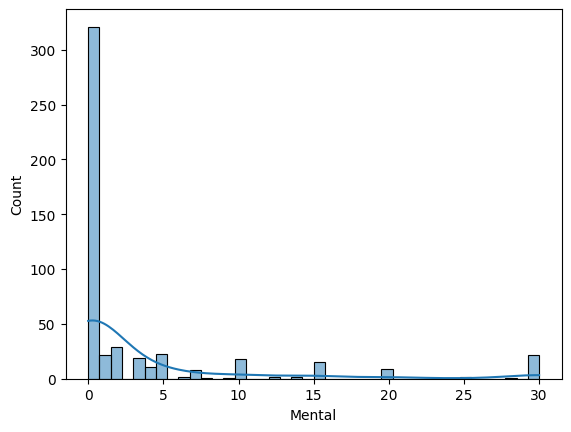

In [44]:
sns.histplot(df_cluster.Mental, kde = True);

In [503]:
df_cluster.Mental.value_counts()[:5]

0.0    321
2.0     29
5.0     23
Name: Mental, dtype: int64

In [86]:
df_cluster.Mental.median()

0.0

In [91]:
df_cluster.Mental.mean()

3.456692913385827

In [531]:
# For "Mental"
print('mode:',df_cluster.Mental.mode().values[0],'median: ',df_cluster.Mental.median(),'mean:',df_cluster.Mental.mean())

mode: 0.0 median:  0.0 mean: 3.456692913385827


The "bmicat4" and "cholesterol" variables are categorical (categories 1,2,3,4) and (categories 1,2,3), respectively. For both, the most common values are 2, so it seems best to impute them with 2.

In [509]:
df_cluster.BMI.value_counts()

2.0    199
3.0    176
4.0    131
1.0      5
Name: BMI, dtype: int64

In [510]:
df_cluster.Cholesterol.value_counts()

2.0    401
1.0    109
3.0      2
Name: Cholesterol, dtype: int64

In [17]:
# Impute
df_cluster.BMI.fillna(2,inplace = True)
df_cluster.Cholesterol.fillna(2,inplace = True)

The remaining NaNs can be dropped since there are only 7 of them left

In [18]:
df_cluster.dropna(inplace = True)

In [153]:
#round(df_cluster,0).astype('int')

## K Means 

In [13]:
# View dataframe stats
round(df_cluster.describe(),1)

,Health,Age,MVPA,Diet,Exer_routine,gym_member,screentime,phys7,tobacco1,bmicat4,cholesterol,Diabetes,Hypertension,Sleep,Mental,counts_avg,moderate_avg
count,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,2.4,2.8,698.0,2.7,1.5,1.6,4.8,1.5,2.8,2.8,1.8,1.9,1.7,8.3,3.4,284645.2,32.5
std,1.0,0.8,884.9,1.0,0.5,0.5,2.1,0.5,0.6,0.9,0.4,0.3,0.5,9.5,7.2,138253.2,25.8
min,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36479.0,0.0
25%,2.0,2.0,170.0,2.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,2.0,1.0,0.0,0.0,187652.8,13.0
50%,2.0,3.0,420.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,5.0,0.0,257931.5,27.0
75%,3.0,3.0,840.0,3.0,2.0,2.0,6.0,2.0,3.0,4.0,2.0,2.0,2.0,15.0,3.0,354922.8,46.0
max,5.0,4.0,5460.0,5.0,2.0,2.0,11.0,2.0,3.0,4.0,3.0,2.0,2.0,30.0,30.0,1109214.0,194.0


In [20]:
# Transform the data (so that features have similar ranges)
df_cluster_trans = StandardScaler().fit_transform(df_cluster)

# Create new dataframe
df_cluster_trans = pd.DataFrame(df_cluster_trans, columns = df_cluster.columns.tolist())

In [15]:
round(df_cluster_trans.describe(),1)

,Health,Age,MVPA,Diet,Exer_routine,gym_member,screentime,phys7,tobacco1,bmicat4,cholesterol,Diabetes,Hypertension,Sleep,Mental,counts_avg,moderate_avg
count,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.4,-3.4,-0.8,-2.6,-1.0,-1.4,-2.3,-1.1,-4.7,-3.3,-4.0,-6.1,-3.8,-0.9,-0.5,-1.8,-1.3
25%,-0.4,-1.0,-0.6,-0.6,-1.0,-1.4,-0.8,-1.1,0.4,-1.0,0.5,0.3,-1.6,-0.9,-0.5,-0.7,-0.8
50%,-0.4,0.3,-0.3,0.3,1.0,0.7,-0.4,0.9,0.4,0.2,0.5,0.3,0.6,-0.3,-0.5,-0.2,-0.2
75%,0.6,0.3,0.2,0.3,1.0,0.7,0.6,0.9,0.4,1.4,0.5,0.3,0.6,0.7,-0.1,0.5,0.5
max,2.5,1.5,5.4,2.2,1.0,0.7,2.9,0.9,0.4,1.4,2.8,0.3,0.6,2.3,3.7,6.0,6.3


We can see that after transformation, the mean of all the features is zero, and the standard deviation is 1.

### Elbow Method

Not let us plot the Sum of Squares Errors (SSE) of the K means model vs. the number of clusters to get an idea for the number of clusters we should use:

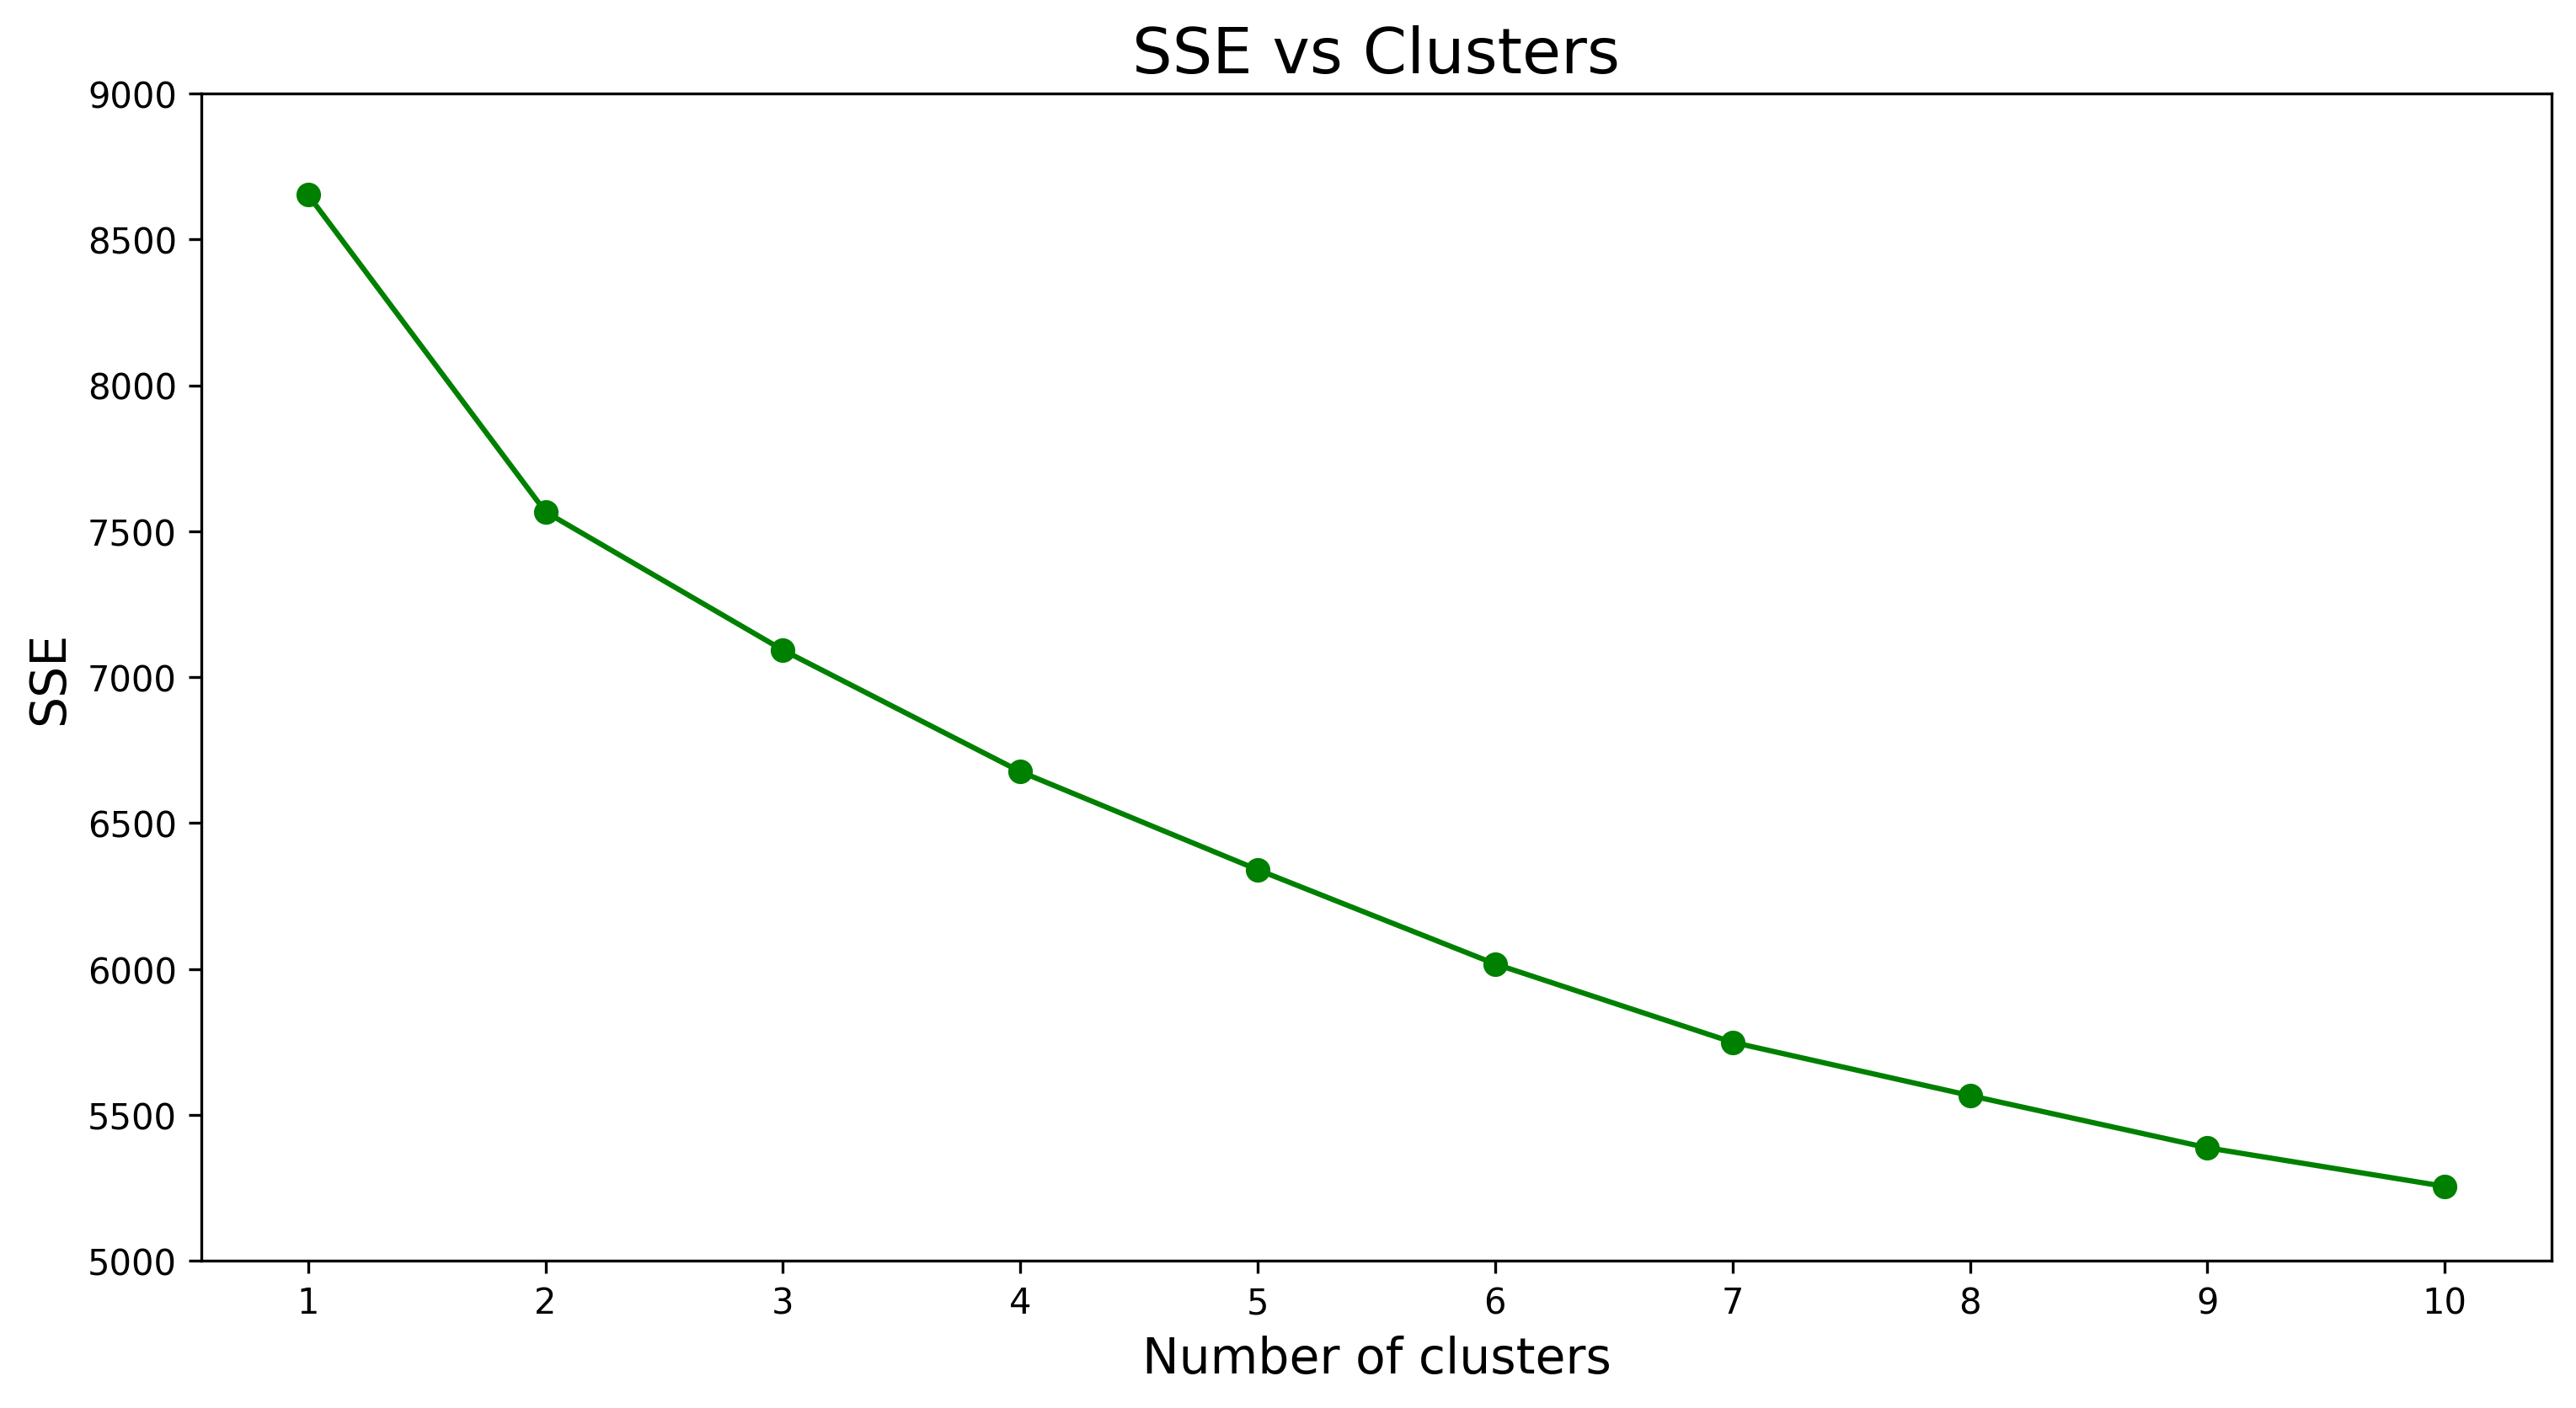

In [21]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',random_state = 0, n_init = 30)
    kmeans.fit(df_cluster_trans)
    SSE.append(kmeans.inertia_)
    
#frame = pd.DataFrame({'Number of clusters':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6), dpi=300)
plt.plot(range(1,11), SSE, marker='o', color = 'g')
plt.title("SSE vs Clusters", fontsize = 18)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('SSE', fontsize = 14)
plt.xticks(range(1,11));
plt.yticks(np.arange(5000,9001,500));

#SSE: Sum Squared Error

We can see that the error drops off sharply between 1 and 2 clusters. So, according to this chart, using 2 clusters would be optimal. Let us run the K means algorithms with 3 clusters and see the result.

### Cluster analysis with 2 clusters:

Cluster 1  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1201409,5.0,4.0,480.0,3.0,2.0,2.0,7.0,2.0,3.0,2.0,2.0,2.0,1.0,15.0,3.0,140322.333333,0.333333,0
1202209,4.0,2.0,315.0,3.0,2.0,2.0,8.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,0.0,498495.000000,76.000000,0
1202017,3.0,3.0,315.0,4.0,2.0,2.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,30.0,2.0,407543.000000,51.000000,0
1200594,4.0,4.0,0.0,1.0,1.0,2.0,6.0,2.0,3.0,2.0,2.0,2.0,1.0,0.0,0.0,36479.333333,0.666667,0
1200022,3.0,2.0,1890.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,20.0,0.0,187304.714286,25.857143,0


Average  Health : 2.9
Average  Age : 3.1
Average  MVPA : 525.9
Average  Diet : 3.1
Average  Exer_routine : 1.8
Average  Gym_member : 1.8
Average  Screentime : 5.5
Average  phys7 : 1.8
Average  Tobacco : 2.6
Average  BMI : 3.1
Average  Cholesterol : 1.7
Average  Diabetes : 1.8
Average  Hypertension : 1.5
Average  Sleep : 9.6
Average  Mental : 4.6
Average  Counts_avg : 213930.8
Average  Moderate_avg : 20.6
Average  Cluster : 0.0
Cluster 2  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1201198,3.0,3.0,120.0,1.0,1.0,2.0,5.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,0.0,506142.000000,55.285714,1
1201878,2.0,2.0,3360.0,3.0,2.0,2.0,6.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,258598.428571,36.857143,1
1200199,2.0,1.0,210.0,3.0,2.0,2.0,6.0,2.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,466374.428571,74.285714,1
1201720,2.0,3.0,655.0,2.0,1.0,1.0,7.0,1.0,3.0,2.0,1.0,2.0,1.0,15.0,0.0,357844.000000,39.428571,1
1200679,2.0,4.0,105.0,1.0,1.0,2.0,4.0,2.0,3.0,2.0,2.0,1.0,2.0,8.0,7.0,288317.166667,34.000000,1


Average  Health : 1.9
Average  Age : 2.5
Average  MVPA : 864.6
Average  Diet : 2.3
Average  Exer_routine : 1.3
Average  Gym_member : 1.5
Average  Screentime : 4.1
Average  phys7 : 1.3
Average  Tobacco : 2.9
Average  BMI : 2.6
Average  Cholesterol : 1.9
Average  Diabetes : 2.0
Average  Hypertension : 1.9
Average  Sleep : 6.9
Average  Mental : 2.3
Average  Counts_avg : 349751.3
Average  Moderate_avg : 44.3
Average  Cluster : 1.0


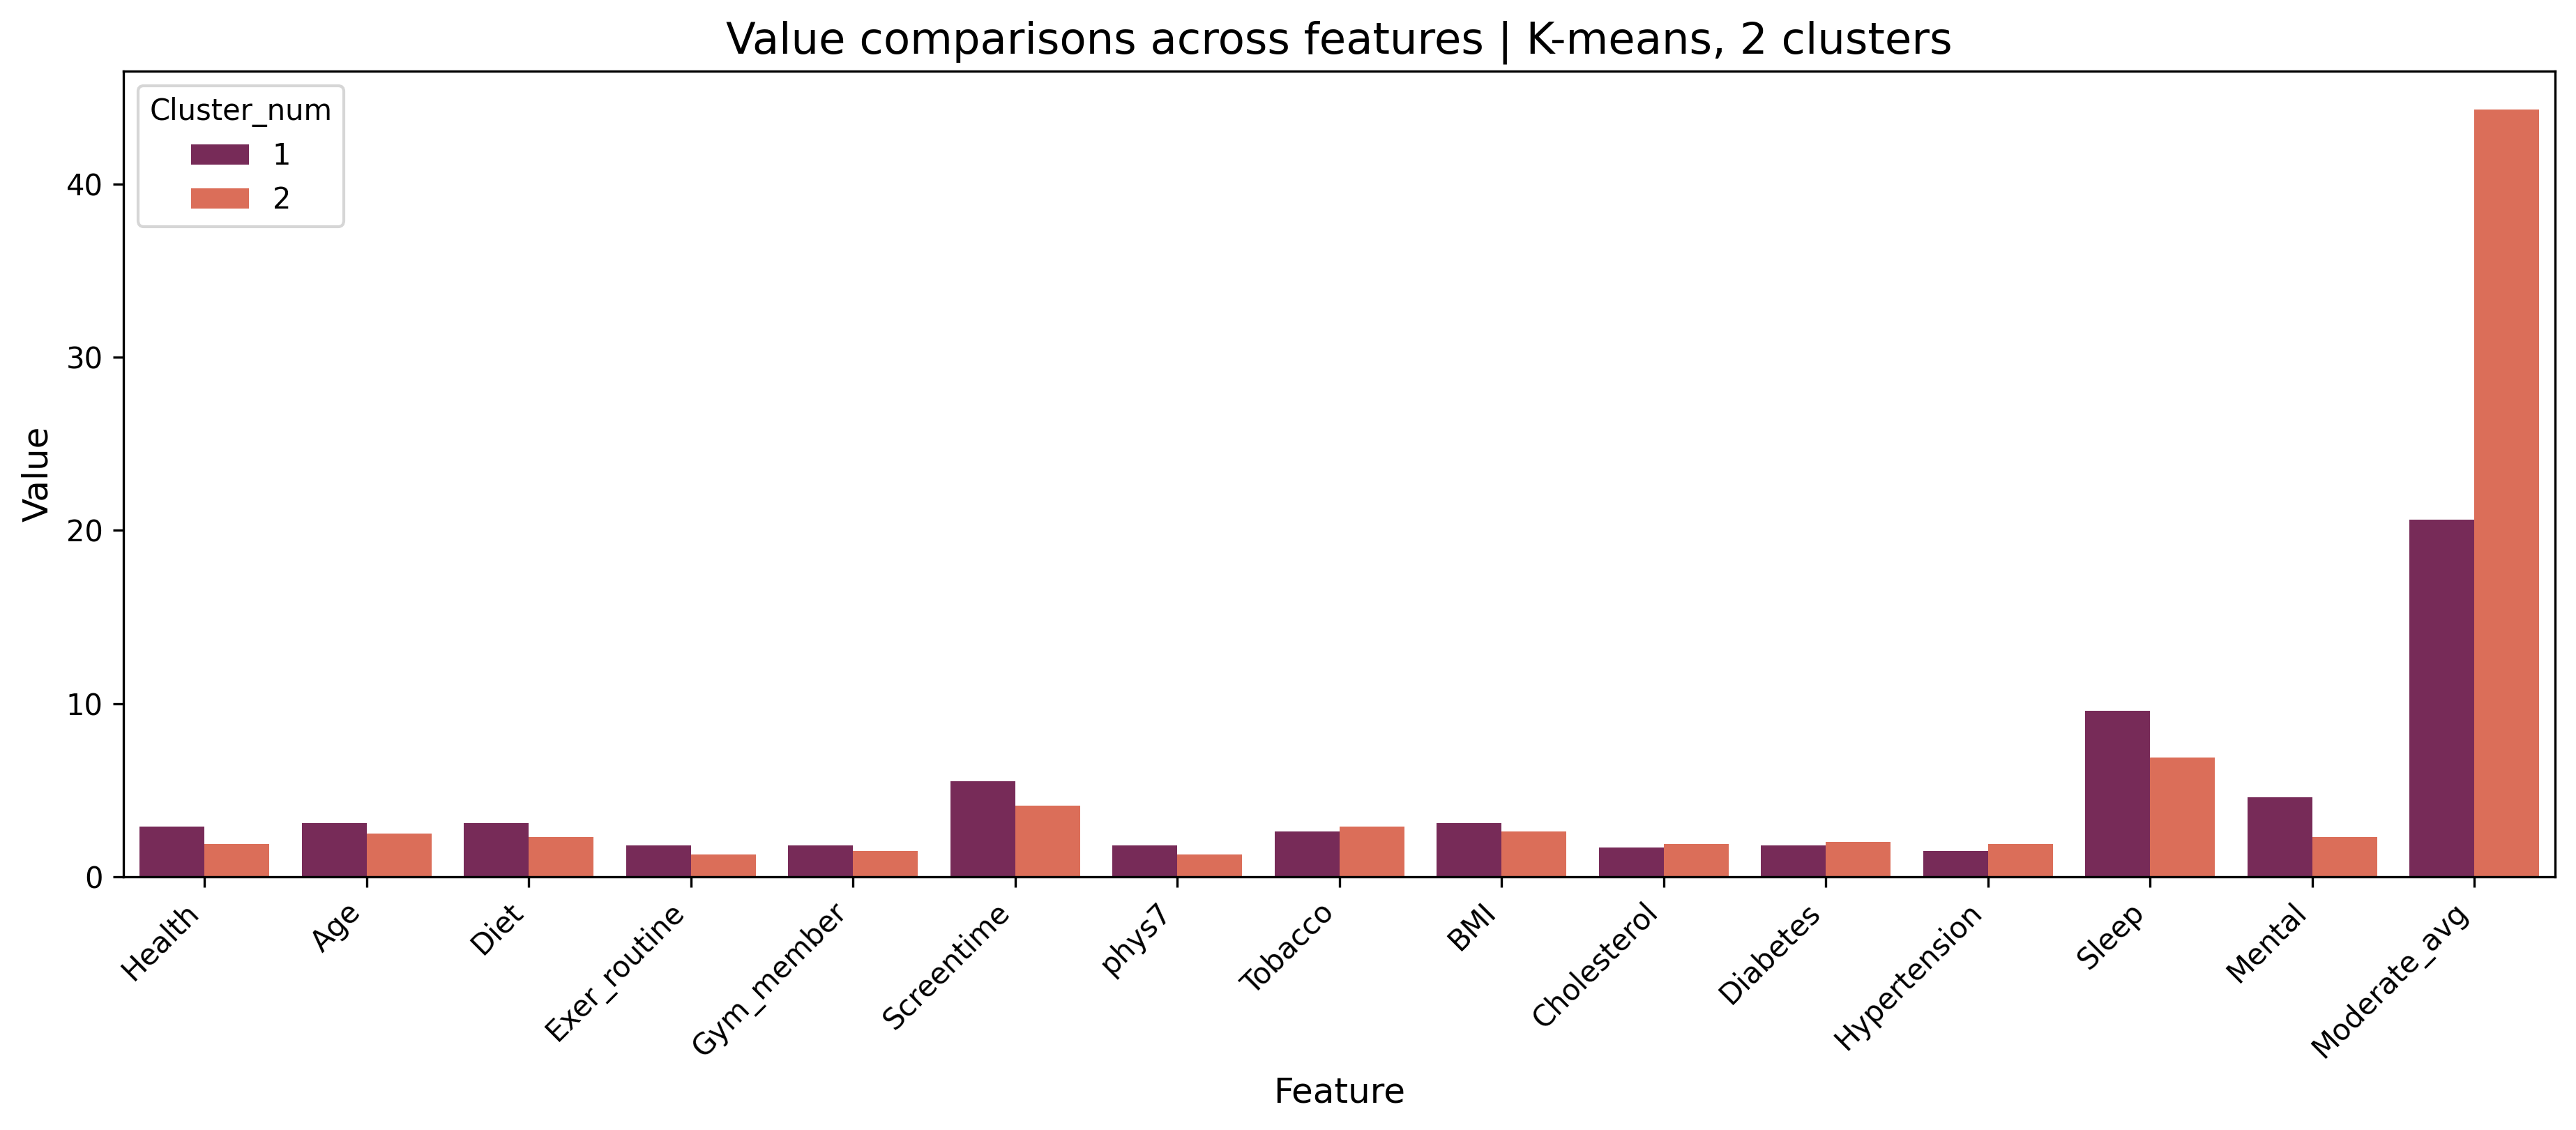

In [40]:
n_clusters = 2

k_means = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 30 ,random_state = 0)
k_means.fit(df_cluster_trans)
df_KNN = df_cluster.copy()
df_KNN['Cluster'] = k_means.labels_

for i in range(n_clusters):
    print("Cluster",i+1," (random sample of 5):")
    display(df_KNN[df_KNN['Cluster'] == i].sample(5))
    for j in df_KNN.columns:
        print("Average ", j, ":", round(np.mean(df_KNN[df_KNN['Cluster'] == i][j]),1))
        
# Create visualization of value differences via barbplot.
# Features "MVPA" and "counts_avg" not included in the bar plot as they are orders of magnitude larger than other 
# variables.

info = []
cols = []

columns = ['Health', 'Age', 'Diet', 'Exer_routine', 'Gym_member', 'Screentime', 'phys7', 'Tobacco', 
           'BMI', 'Cholesterol','Diabetes', 'Hypertension', 'Sleep', 'Mental','Moderate_avg']

for i in columns:   
    for c in range(2):
        info.append(round(np.mean(df_KNN[df_KNN['Cluster'] == c][i]),1))

for i in columns:
    for j in range(2):
        cols.append(i)

cluster_num = [1,2]*len(columns)
        
df_t = pd.DataFrame({"info": info, "Cluster_num": cluster_num, 'name': cols}) 
plt.figure(figsize=(15,5), dpi=300)
ax = sns.barplot(x = 'name', y = 'info', hue='Cluster_num', palette='rocket', data=df_t)

ax.set_title('Value comparisons across features | K-means, 2 clusters', fontsize = 15)
ax.set_xlabel('Feature', fontsize = 12)
ax.set_ylabel('Value',fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

   

In [26]:
for i in range(0,2):
    print("Number of participants with an exercise routine in cluster ", i+1, ":",\
    df_KNN[(df_KNN['Cluster'] == i)]['Exer_routine'][df_KNN['Exer_routine'] == 1].sum())

Number of participants with an exercise routine in cluster  1 : 57.0
Number of participants with an exercise routine in cluster  2 : 185.0


In [25]:
for i in range(0,2):
    for j in ['Diabetes','Hypertension','Cholesterol']:
        print("Number of participants with", j, " in cluster ", i+1, ":",\
        df_KNN[df_KNN['Cluster'] == i][j][df_KNN[j] == 1].sum())

Number of participants with Diabetes  in cluster  1 : 43.0
Number of participants with Hypertension  in cluster  1 : 112.0
Number of participants with Cholesterol  in cluster  1 : 76.0
Number of participants with Diabetes  in cluster  2 : 9.0
Number of participants with Hypertension  in cluster  2 : 30.0
Number of participants with Cholesterol  in cluster  2 : 32.0


Note: "with cholesterol" means "with high cholesterol"

We took a random sample of 8 participants for each cluster and printed the average value of each variable. 

Based on this, it seems like the algorithm divided people into those that are "Healthy" (cluster 2) and "Unhealthy" (cluster 1).

We could see that cluster 1 contains individuals with an average "Health" variable of 1.9, which is equivalent to "very good", while cluster 2 is at 2.9, which is just "good". Surprisingly, the average ages are very similar, with cluster 1 being a little older (as to be expected). 

Notable characteristics of Cluster 2 (Healthy):
- Slightly Better Diet 
- Much less screentime (about 2 hours, compared to Cluster 1's 3.5 hours average)
- Slightly lower BMI
- Participants with diabetes, hypertension, and high cholesterol: (43,9), (112,30), and (76,32) for clusters 1 and 2, respectively. So there are drastic differences in chronic conditions.
- Slightly better mental health.
- Better Sleep (2.5 days less bad sleep days during the last 30 days)

Now, as for physical activity, we see some very clear differences:

- An average of about 15,000 more average accelerometer counts (or over 60% more) in cluster 2.
- Over twice (!) (120% more) the average number of minutes of moderate physical activity intensity (as opposed to light and vigorous) on all valid days, measured by accelerometer for cluster 2.
- Over twice the number of people with an exerice routine in cluster 2

For reference, the clusters form almost an even split of the data, with Cluster 1 containing 250 samples, while sample 2 has 266.

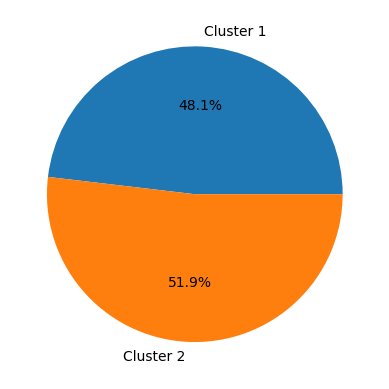

In [27]:
code_portions = df_KNN['Cluster'].value_counts().sort_values()
labels = ["Cluster 1", "Cluster 2"]
fig, ax = plt.subplots();
ax.pie(code_portions, labels=labels, autopct='%1.1f%%');

## Gaussian Mixture Model (GMM)

Now let us see how the clusters will differ with another cluster algorithm, GMM

To help us determine the right number of clusters to use, we will use 2 estimators of prediction error: Akaike information criterion (AIC) and Bayesian information criterion (BIC). These estimate the relative amount of information lost by a given model. The error will naturally go down with more clusters used, but, as we did with the K means algorithm, we will use the cluster that occurs after the 'steepest' decline in error on the graph. In this case, that number seems to be 4 or 3. Let us start with 3 clusters, then 4. 

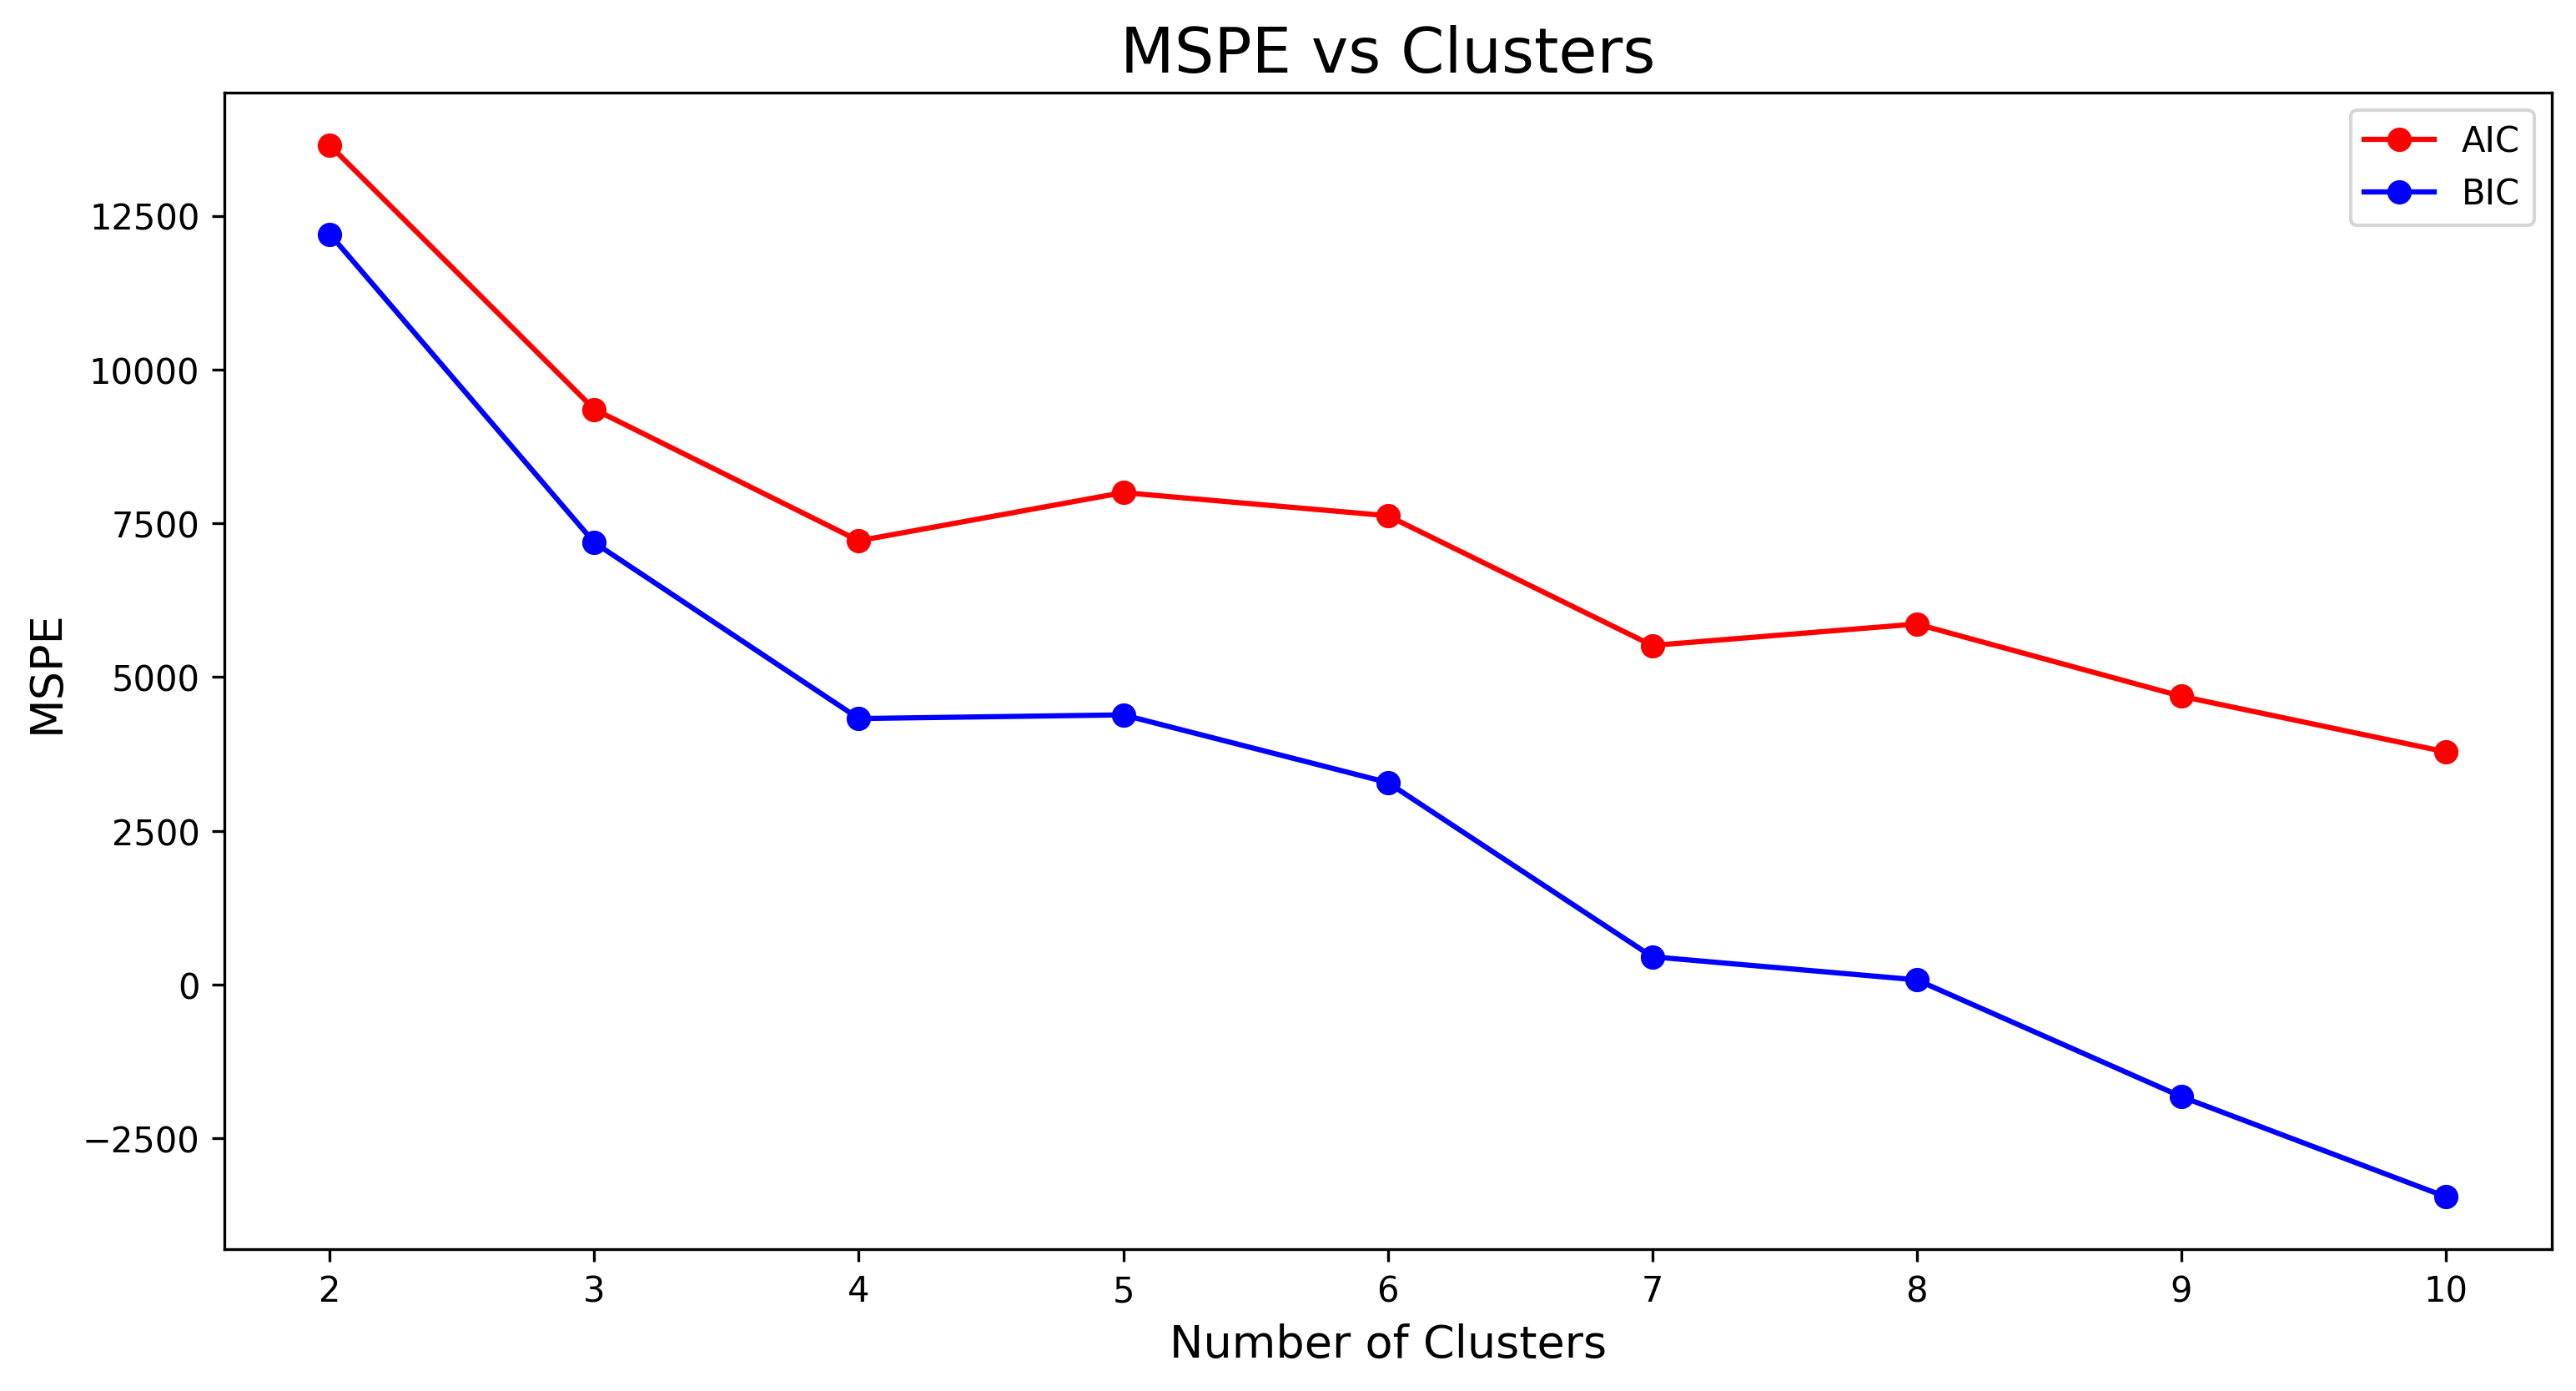

In [28]:
bic_tot = []
aic_tot = []
cluster_range = range(2,11)

for i in cluster_range:
    
    gmm = GaussianMixture(n_components = i,n_init = 100,random_state = 0).fit(df_cluster_trans)
    #labels = gmm.predict(df_cluster_trans)
    #silhouette = metrics.silhouette_score(df_cluster_trans, labels, metric='euclidean')
    #silhouettes.append(silhouette)
    bic_tot.append(gmm.bic(df_cluster_trans))
    aic_tot.append(gmm.aic(df_cluster_trans))
   
plt.figure(figsize=(12,6), dpi=300)
plt.plot(cluster_range, bic_tot, 'o-', color='red',label = "AIC")
plt.plot(cluster_range, aic_tot, 'o-', color='blue',label = "BIC")
plt.title('MSPE vs Clusters', fontsize = 18)
plt.xlabel('Number of Clusters', fontsize = 13)
plt.ylabel('MSPE', fontsize = 13)
plt.xticks(range(2,11));
plt.legend()
plt.show()

# MSPE: mean squared prediction error

### With 3 Clusters:

Cluster 1  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1200983,4.0,3.0,30.0,4.0,2.0,2.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,401785.285714,49.000000,0
1200455,1.0,3.0,255.0,4.0,1.0,2.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,214963.500000,16.166667,0
1201922,4.0,2.0,270.0,4.0,2.0,2.0,5.0,2.0,1.0,3.0,1.0,2.0,2.0,10.0,0.0,133754.571429,4.857143,0
1200367,4.0,3.0,170.0,3.0,2.0,2.0,5.0,2.0,1.0,2.0,2.0,2.0,1.0,30.0,30.0,544449.000000,76.428571,0
1202320,2.0,3.0,1290.0,3.0,2.0,2.0,4.0,1.0,2.0,3.0,1.0,2.0,2.0,7.0,10.0,424677.166667,68.833333,0


Average  Health : 3.2
Average  Age : 2.9
Average  MVPA : 1087.2
Average  Diet : 3.3
Average  Exer_routine : 1.7
Average  Gym_member : 1.8
Average  Screentime : 5.3
Average  phys7 : 1.8
Average  Tobacco : 1.2
Average  BMI : 2.9
Average  Cholesterol : 1.3
Average  Diabetes : 1.7
Average  Hypertension : 1.6
Average  Sleep : 11.1
Average  Mental : 7.6
Average  Counts_avg : 234640.8
Average  Moderate_avg : 21.9
Average  Cluster : 0.0
Cluster 2  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1201304,3.0,2.0,100.0,3.0,2.0,2.0,4.0,1.0,3.0,3.0,2.0,2.0,1.0,5.0,2.0,338941.666667,30.833333,1
1201292,3.0,2.0,1540.0,3.0,1.0,2.0,5.0,2.0,3.0,3.0,2.0,1.0,2.0,10.0,5.0,764218.857143,114.571429,1
1200239,2.0,2.0,990.0,3.0,2.0,1.0,11.0,2.0,3.0,4.0,2.0,2.0,1.0,4.0,0.0,338523.666667,24.166667,1
1200059,3.0,4.0,0.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,251848.166667,27.833333,1
1200970,4.0,4.0,60.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,30.0,323372.571429,30.142857,1


Average  Health : 2.7
Average  Age : 3.2
Average  MVPA : 549.7
Average  Diet : 2.7
Average  Exer_routine : 1.5
Average  Gym_member : 1.7
Average  Screentime : 5.1
Average  phys7 : 1.6
Average  Tobacco : 3.0
Average  BMI : 3.0
Average  Cholesterol : 1.5
Average  Diabetes : 1.8
Average  Hypertension : 1.3
Average  Sleep : 8.1
Average  Mental : 3.3
Average  Counts_avg : 242445.4
Average  Moderate_avg : 25.9
Average  Cluster : 1.0
Cluster 3  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1202479,2.0,2.0,140.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,7.0,0.0,190097.285714,12.857143,2
1202451,1.0,1.0,5340.0,2.0,1.0,1.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,3.0,0.0,375248.285714,73.000000,2
1200398,1.0,3.0,1400.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,15.0,0.0,326721.857143,40.142857,2
1200570,2.0,4.0,720.0,2.0,1.0,1.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,317578.571429,62.428571,2
1200287,2.0,2.0,1880.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,15.0,3.0,388558.571429,32.000000,2


Average  Health : 2.1
Average  Age : 2.5
Average  MVPA : 767.8
Average  Diet : 2.6
Average  Exer_routine : 1.5
Average  Gym_member : 1.6
Average  Screentime : 4.6
Average  phys7 : 1.5
Average  Tobacco : 2.8
Average  BMI : 2.7
Average  Cholesterol : 2.0
Average  Diabetes : 2.0
Average  Hypertension : 2.0
Average  Sleep : 8.0
Average  Mental : 3.0
Average  Counts_avg : 317283.5
Average  Moderate_avg : 38.6
Average  Cluster : 2.0


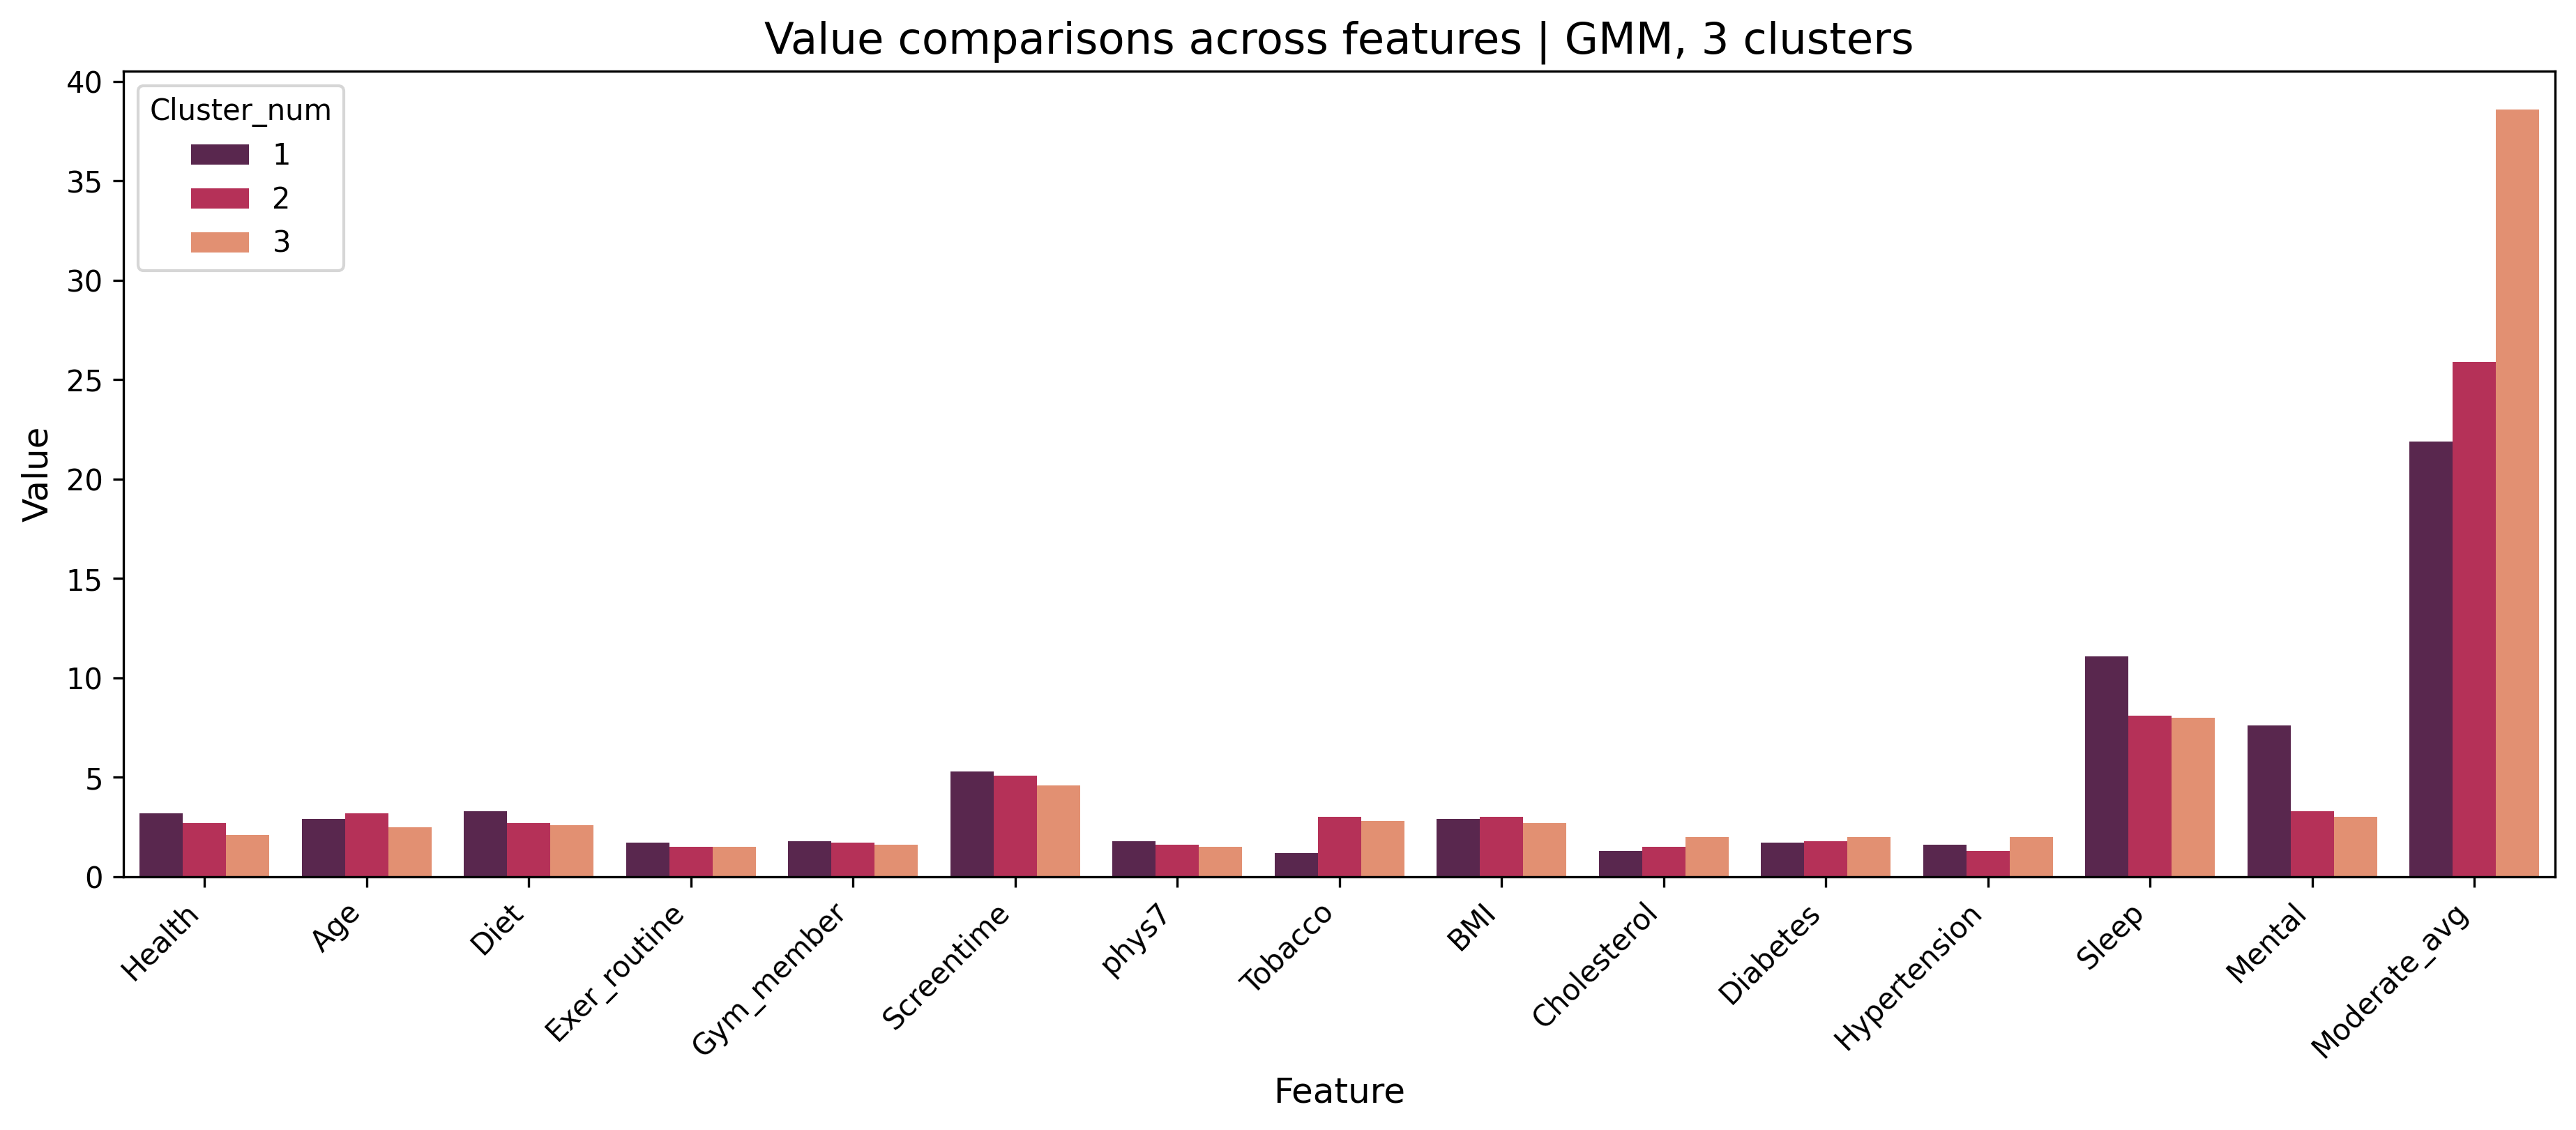

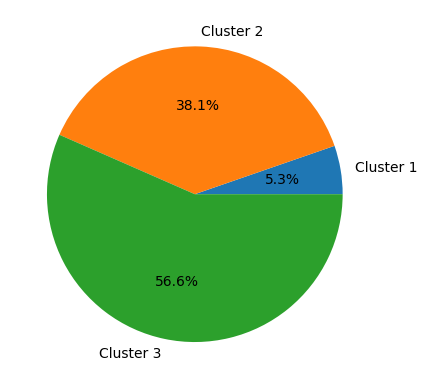

In [41]:
n_clusters = 3

gm = GaussianMixture(n_components=n_clusters, n_init = 10,random_state = 0).fit(df_cluster_trans)
df_cluster_GMM3 = df_cluster.copy()
df_cluster_GMM3['Cluster'] = gm.predict(df_cluster_trans)

for i in range(n_clusters):
    print("Cluster",i+1," (random sample of 5):")
    display(df_cluster_GMM3[df_cluster_GMM3['Cluster'] == i].sample(5))
    for j in df_cluster_GMM3.columns:
        print("Average ", j, ":", round(np.mean(df_cluster_GMM3[df_cluster_GMM3['Cluster'] == i][j]),1))

# Create visualization of value differences via barbplot.
# Features "MVPA" and "counts_avg" not included in the bar plot as they are orders of magnitude larger than other 
# variables.

info = []
cols = []

columns = ['Health', 'Age', 'Diet', 'Exer_routine', 'Gym_member', 'Screentime', 'phys7', 'Tobacco', 
           'BMI', 'Cholesterol','Diabetes', 'Hypertension', 'Sleep', 'Mental','Moderate_avg']

for i in columns:   
    for c in range(n_clusters):
        info.append(round(np.mean(df_cluster_GMM3[df_cluster_GMM3['Cluster'] == c][i]),1))

for i in columns:
    for j in range(n_clusters):
        cols.append(i)

cluster_num = [1,2,3]*len(columns)
        
df_t = pd.DataFrame({"info": info, "Cluster_num": cluster_num, 'name': cols}) 
plt.figure(figsize=(15,5), dpi=300)
ax = sns.barplot(x = 'name', y = 'info', hue='Cluster_num', palette='rocket', data=df_t)

ax.set_title('Value comparisons across features | GMM, 3 clusters', fontsize = 15)
ax.set_xlabel('Feature', fontsize = 12)
ax.set_ylabel('Value',fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

code_portions = df_cluster_GMM3['Cluster'].value_counts().sort_values()
labels = ["Cluster 1", "Cluster 2","Cluster 3"]
fig, ax = plt.subplots();
ax.pie(code_portions, labels=labels, autopct='%1.1f%%');

Cluster 1 stands out as the least healthy. It has the least reported health, worst physical health metrics, least sleep, and worst self-identified mental health. This cluster makes up 5% of the group.

Cluster 3 is healthiest, overall. It really stands out by its accelerometer indicators. Participants here have been the most active during the test week. These is the majority of people surveyed.

Cluster 2 is average. It is in between the 2 other clusters in all the health metrics. What stands out is that the age here is the highest, so it seems like the people that fall into this classification are moslty elderly, which makes sense. 

### With 4 Clusters:

Cluster 1  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1200059,3.0,4.0,0.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,251848.166667,27.833333,0
1202299,4.0,3.0,270.0,3.0,2.0,2.0,11.0,2.0,3.0,4.0,2.0,1.0,1.0,0.0,20.0,135546.285714,3.142857,0
1200672,2.0,4.0,345.0,2.0,1.0,1.0,4.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,154038.333333,9.333333,0
1200145,4.0,3.0,190.0,4.0,2.0,1.0,6.0,2.0,3.0,4.0,2.0,1.0,1.0,15.0,8.0,146464.333333,4.000000,0
1202017,3.0,3.0,315.0,4.0,2.0,2.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,30.0,2.0,407543.000000,51.000000,0


Average  Health : 3.1
Average  Age : 3.3
Average  MVPA : 477.1
Average  Diet : 2.8
Average  Exer_routine : 1.6
Average  Gym_member : 1.7
Average  Screentime : 5.5
Average  phys7 : 1.6
Average  Tobacco : 2.8
Average  BMI : 3.2
Average  Cholesterol : 1.7
Average  Diabetes : 1.0
Average  Hypertension : 1.4
Average  Sleep : 7.8
Average  Mental : 4.0
Average  Counts_avg : 216143.6
Average  Moderate_avg : 23.0
Average  Cluster : 0.0
Cluster 2  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1200840,2.0,3.0,450.0,2.0,2.0,2.0,5.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,205983.142857,27.000000,1
1200142,1.0,3.0,2700.0,3.0,1.0,1.0,4.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,0.0,678348.714286,90.571429,1
1201985,3.0,2.0,870.0,5.0,1.0,1.0,4.0,1.0,3.0,4.0,1.0,2.0,2.0,15.0,20.0,222156.714286,33.428571,1
1200175,3.0,3.0,280.0,3.0,2.0,2.0,6.0,2.0,3.0,3.0,1.0,2.0,2.0,7.0,0.0,99752.285714,4.142857,1
1201210,1.0,3.0,2265.0,2.0,2.0,2.0,4.0,2.0,3.0,4.0,2.0,2.0,1.0,2.0,0.0,125047.428571,3.428571,1


Average  Health : 2.6
Average  Age : 3.1
Average  MVPA : 559.2
Average  Diet : 2.7
Average  Exer_routine : 1.5
Average  Gym_member : 1.7
Average  Screentime : 5.1
Average  phys7 : 1.6
Average  Tobacco : 3.0
Average  BMI : 2.9
Average  Cholesterol : 1.5
Average  Diabetes : 2.0
Average  Hypertension : 1.3
Average  Sleep : 7.5
Average  Mental : 2.0
Average  Counts_avg : 247676.5
Average  Moderate_avg : 25.9
Average  Cluster : 1.0
Cluster 3  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1202320,2.0,3.0,1290.0,3.0,2.0,2.0,4.0,1.0,2.0,3.0,1.0,2.0,2.0,7.0,10.0,424677.166667,68.833333,2
1200834,4.0,3.0,300.0,4.0,1.0,1.0,5.0,2.0,3.0,4.0,1.0,2.0,1.0,30.0,30.0,88615.714286,1.285714,2
1201922,4.0,2.0,270.0,4.0,2.0,2.0,5.0,2.0,1.0,3.0,1.0,2.0,2.0,10.0,0.0,133754.571429,4.857143,2
1202358,1.0,4.0,20.0,2.0,2.0,2.0,4.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,429367.666667,43.000000,2
1202135,2.0,3.0,465.0,3.0,2.0,2.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,30.0,0.0,300323.166667,37.833333,2


Average  Health : 3.1
Average  Age : 2.9
Average  MVPA : 1134.8
Average  Diet : 3.0
Average  Exer_routine : 1.8
Average  Gym_member : 1.8
Average  Screentime : 4.8
Average  phys7 : 1.9
Average  Tobacco : 1.8
Average  BMI : 2.9
Average  Cholesterol : 1.3
Average  Diabetes : 2.0
Average  Hypertension : 1.4
Average  Sleep : 14.1
Average  Mental : 12.1
Average  Counts_avg : 257087.6
Average  Moderate_avg : 27.4
Average  Cluster : 2.0
Cluster 4  (random sample of 5):


,Health,Age,MVPA,Diet,Exer_routine,Gym_member,Screentime,phys7,Tobacco,BMI,Cholesterol,Diabetes,Hypertension,Sleep,Mental,Counts_avg,Moderate_avg,Cluster
1200436,3.0,2.0,990.0,1.0,2.0,2.0,1.0,1.0,2.0,4.0,2.0,2.0,2.0,4.0,0.0,250989.000000,22.142857,3
1200022,3.0,2.0,1890.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,20.0,0.0,187304.714286,25.857143,3
1202391,3.0,2.0,350.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,5.0,0.0,235754.000000,22.333333,3
1202249,3.0,2.0,570.0,5.0,2.0,2.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,436513.500000,61.833333,3
1201367,3.0,2.0,0.0,3.0,2.0,2.0,5.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,0.0,268365.285714,34.571429,3


Average  Health : 2.1
Average  Age : 2.5
Average  MVPA : 767.8
Average  Diet : 2.6
Average  Exer_routine : 1.5
Average  Gym_member : 1.6
Average  Screentime : 4.6
Average  phys7 : 1.5
Average  Tobacco : 2.8
Average  BMI : 2.7
Average  Cholesterol : 2.0
Average  Diabetes : 2.0
Average  Hypertension : 2.0
Average  Sleep : 8.0
Average  Mental : 3.0
Average  Counts_avg : 317283.5
Average  Moderate_avg : 38.6
Average  Cluster : 3.0


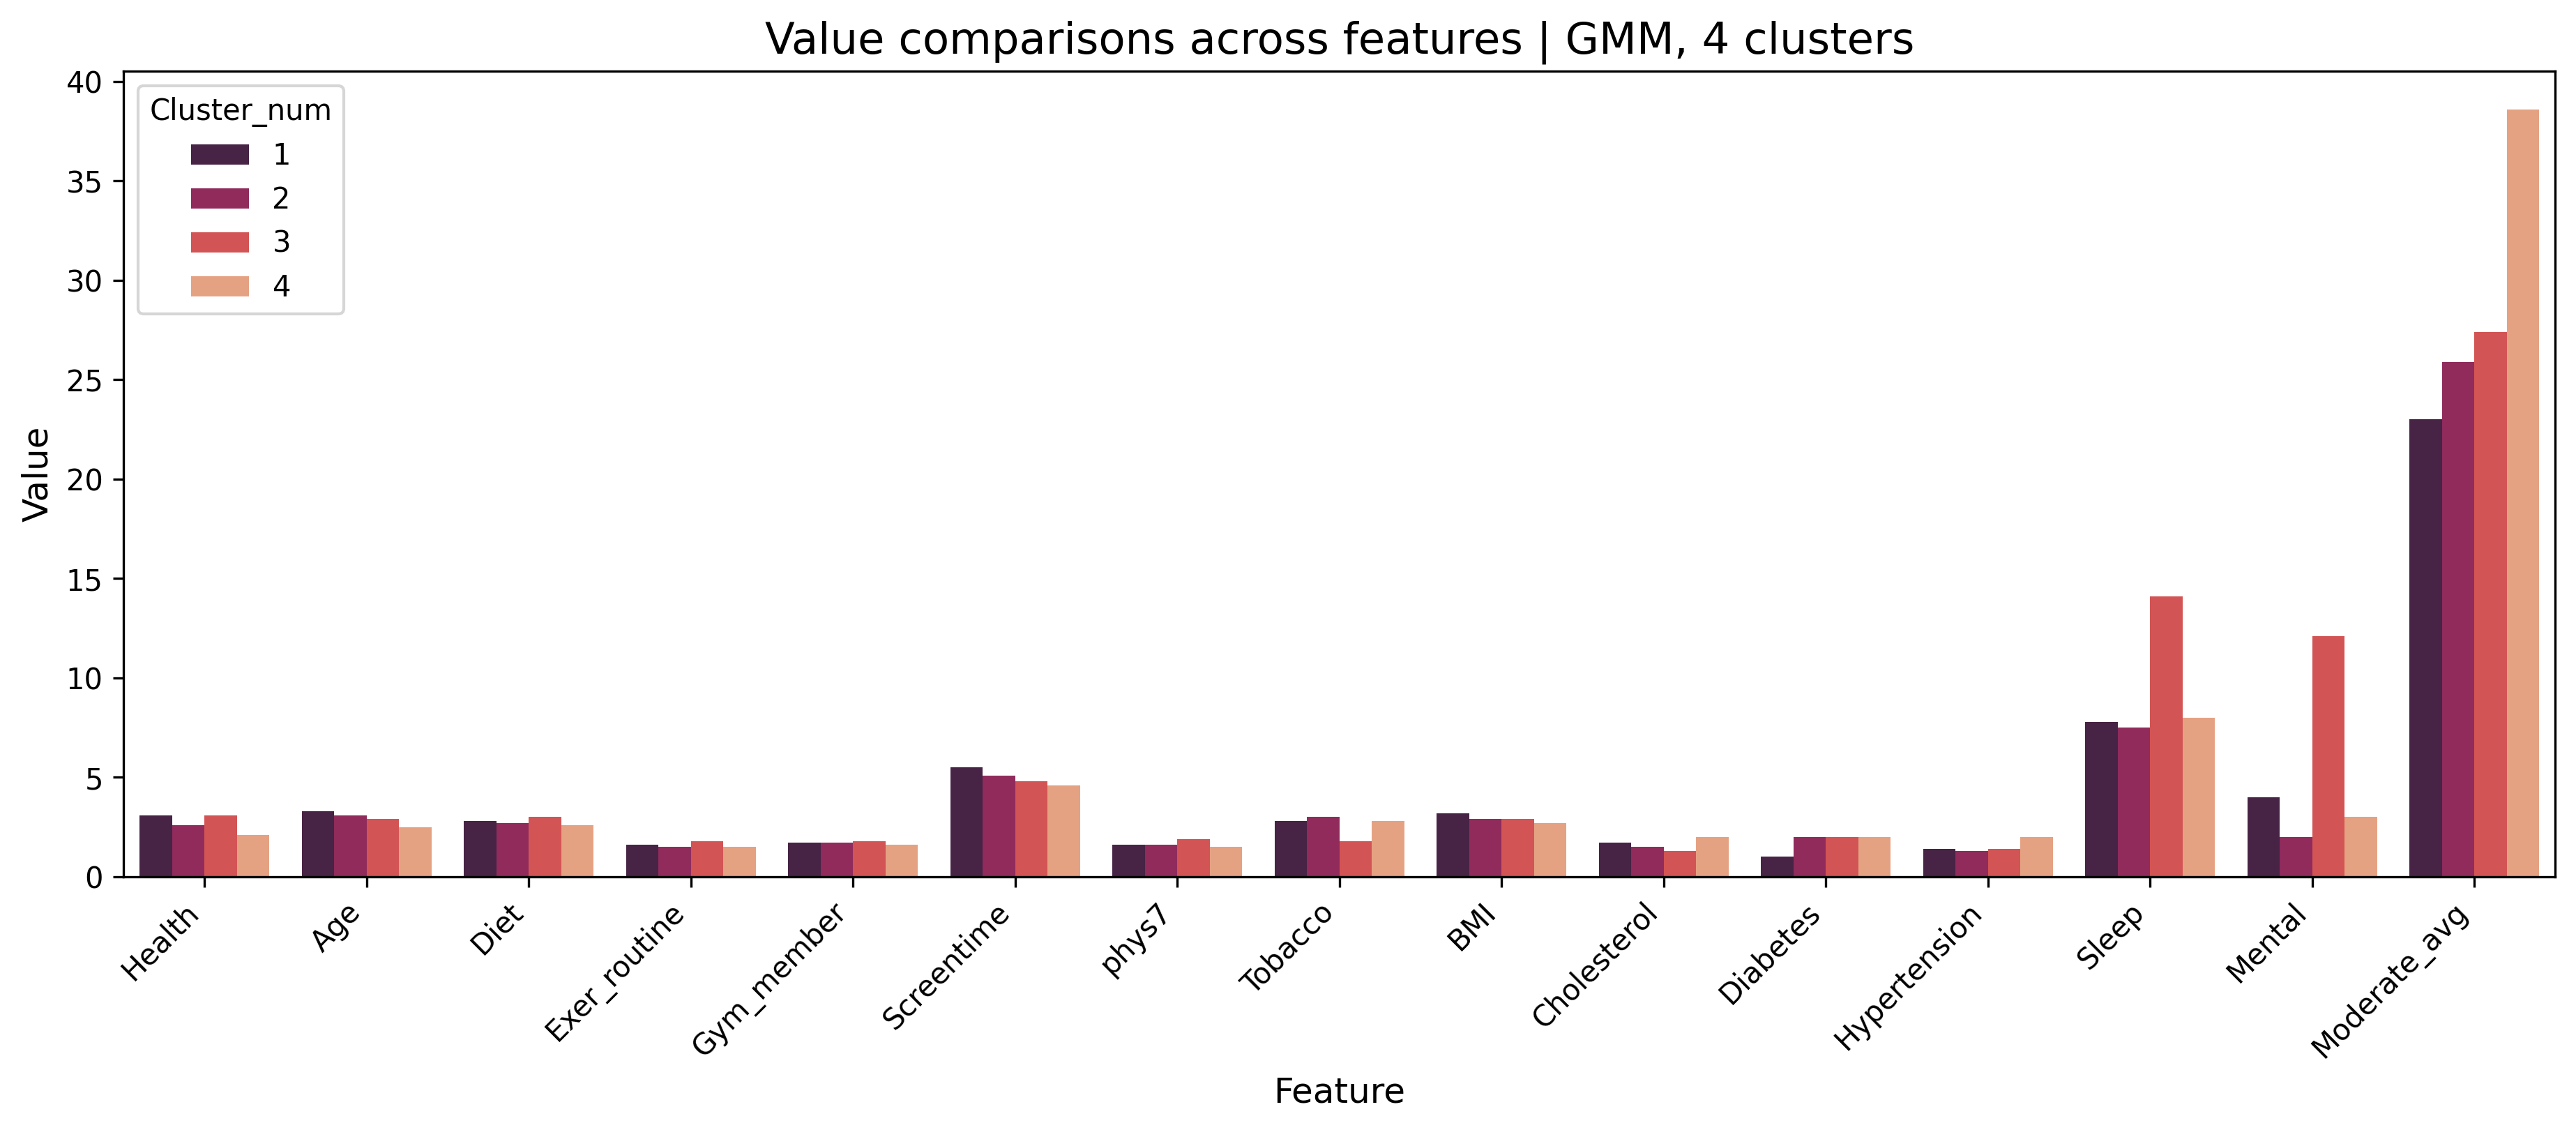

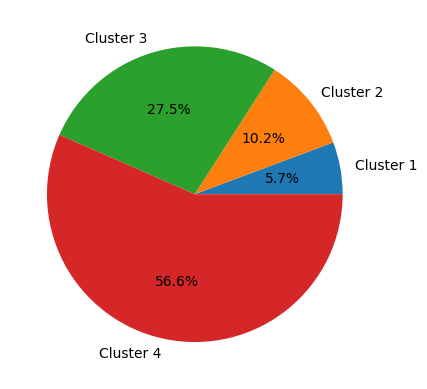

In [42]:
n_clusters = 4

gmm = GaussianMixture(n_components=n_clusters,n_init = 20,random_state = 0).fit(df_cluster_trans)
df_GMM2 = df_cluster.copy()
df_GMM2['Cluster'] = gmm.predict(df_cluster_trans)

for i in range(n_clusters):
    print("Cluster",i+1," (random sample of 5):")
    display(df_GMM2[df_GMM2['Cluster'] == i].sample(5))
    for j in df_GMM2.columns:
        print("Average ", j, ":", round(np.mean(df_GMM2[df_GMM2['Cluster'] == i][j]),1))

# Create visualization of value differences via barbplot.
# Features "MVPA" and "counts_avg" not included in the bar plot as they are orders of magnitude larger than other 
# variables.

info = []
cols = []

columns = ['Health', 'Age', 'Diet', 'Exer_routine', 'Gym_member', 'Screentime', 'phys7', 'Tobacco', 
           'BMI', 'Cholesterol','Diabetes', 'Hypertension', 'Sleep', 'Mental','Moderate_avg']

for i in columns:   
    for c in range(n_clusters):
        info.append(round(np.mean(df_GMM2[df_GMM2['Cluster'] == c][i]),1))

for i in columns:
    for j in range(n_clusters):
        cols.append(i)

cluster_num = [1,2,3,4]*len(columns)
        
df_t = pd.DataFrame({"info": info, "Cluster_num": cluster_num, 'name': cols}) 
plt.figure(figsize=(15,5), dpi=300)
ax = sns.barplot(x = 'name', y = 'info', hue='Cluster_num', palette='rocket', data=df_t)

ax.set_title('Value comparisons across features | GMM, 4 clusters', fontsize = 15)
ax.set_xlabel('Feature', fontsize = 12)
ax.set_ylabel('Value',fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

code_portions = df_GMM2['Cluster'].value_counts().sort_values()
labels = ["Cluster 1", "Cluster 2","Cluster 3","Cluster 4"]
fig, ax = plt.subplots();
ax.pie(code_portions, labels=labels, autopct='%1.1f%%');

Cluster 4 is healthiest, overall. It has the highest reported "health", most exercise (most gym memberships, highest indicators of physical activity), the least screentime, slightly lower BMI.

Cluster 3 stands out as the least healthy in terms of mental health. Participants here got the least sleep, and are self-identified least mentally healthy. However, their exercise attributes are on average, are only second worst.

Cluster 1 is about second healthy, but it is also the oldest, and like with 3 clusters, it seems like this is the reason for the difference in health indicators. 

It is difficult to pit a characteristic to cluster 2, so it is seems best to keep 3 clusters.

**Thus, we will conclude that K means is a better-suited clustering algorithm for our purposes.**